In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

## Создание и обучение простейшей нейронной сети. Цель – освоение основных приемов работы с  НС в ходе создания и обучения простейшей нейронной сети

Задание
1.    Создать и обучить нейронную сеть, которая будет способна решать логическую задачу исключающего «ИЛИ». Таблица истинности для весьма полезной логической функции приведена в табл. 1.
2.    Проверить работоспособность нейронной сети.
3.    Исследовать различные варианты настройки НС и ошибку обучения.
4.    Исследовать различные архитектуры НС: с одним скрытым слоем и разным количеством нейронов и с 2 скрытыми слоями и разным количеством нейронов в каждом скрытом слое

В прошлом задании алгоритм был запрограммирован вручную. Для создания этой модели будем использовать библиотеку TensorFlow. TensorFlow — это библиотека для машинного обучения, группы технологий, которая позволяет обучать искусственный интеллект решению разных задач. Sequential — это тип нейросети, означающий, что процесс обучения будет последовательным. Это стандартный процесс обучения для простых нейросетей: в нём она сначала делает предсказания, затем тестирует их и сравнивает с результатом, а в конце — корректирует ошибки. 

Модель Sequential в Keras использует обратное распространение ошибки (backpropagation) в сочетании с градиентным спуском для оптимизации своих весов. Происходит это по сути по такому же алгоритму, что бы расписан в прошлой практике
1) Прямое распространение: Входные данные проходят через все слои модели, и каждый слой применяет свои веса, смещения и функции активации, чтобы получить выходные значения
2) Подсчет ошибки: На выходе модели вычисляется ошибка с помощью функции потерь, например binary_crossentropy. Эта ошибка показывает, насколько сильно предсказания модели отличаются от реальных меток (y_train)
3) Обратное распространение ошибки: Затем выполняется обратное распространение ошибки, которое рассчитывает градиенты функции потерь по отношению к весам каждого слоя. Обратное распространение позволяет распространить ошибку с выходного слоя назад к входному слою, вычисляя, как изменения каждого веса повлияют на итоговую ошибку
4) Градиентный спуск: После вычисления градиентов веса обновляются с использованием метода градиентного спуска. В данном случае используется оптимизатор adam, который является более продвинутой версией градиентного спуска и автоматически регулирует скорость обучения. Цель градиентного спуска — найти такие значения весов, при которых ошибка будет минимальной

In [20]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Задача XOR имеет всего четыре возможных комбинации входных данных, и они не могут быть разделены таким образом, чтобы модель могла учиться и тестироваться с достаточно хорошей точностью. Поэтому не будем делить данные на тестовые и тренировочные (я пыталась, получилось плохо), попробуем обучать модель на всех четырех комбинациях, а затем проверять её работоспособность на этих же данных. Да, этот подход не позволяет делать независимую оценку качества, но поскольку у нас всего четыре возможных комбинации (все пространство данных), тестирование на тех же данных будет вполне логичным

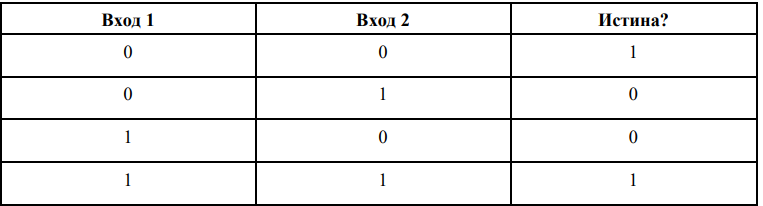

In [21]:
def create_and_train_model(hidden_layers, hidden_neurons, epochs=1000):
    model = Sequential()
    # Входной слой + первый скрытый слой
    model.add(Dense(hidden_neurons[0], input_dim=2, activation='sigmoid')) 
    # Dense - полносвязный слой
    # input_dim=2 указывает, что входной слой имеет два входных нейрона([0, 0] например)
    # Dense создаёт первый скрытый слой, к которому поступают данные из входного слоя
    
    # Дополнительные скрытые слои, если они есть
    for i in range(1, hidden_layers):
        model.add(Dense(hidden_neurons[i], activation='sigmoid'))

    # Выходной слой
    model.add(Dense(1, activation='sigmoid')) # слой с одним нейроном
    
    # Компиляция модели
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    # loss='binary_crossentropy' — функция потерь binary_crossentropy используется для задач бинарной классификации
    # optimizer='adam' — оптимизатор Adam, который адаптивно настраивает скорость обучения
    
    # Обучение модели
    model.fit(X, y, epochs=epochs, verbose=0)
    
    for layer in model.layers:
        print(f"Имя слоя: {layer.name}, Тип слоя: {layer.__class__.__name__}, Количество параметров: {layer.count_params()}")

    # Проверка работоспособности модели
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print(f"Точность: {accuracy * 100:.2f}%")
    
    # Вывод предсказаний
    predictions = model.predict(X)
    print("Предсказания:")
    for i in range(len(X)):
        predicted_class = 1 if predictions[i][0] > 0.5 else 0
        print(f"Данные: {X[i]} -> Предсказание: {predicted_class} ({predictions[i][0]:.2f}), Правильный ответ: {y[i][0]}")
    return model

Исследование различных архитектур НС

In [22]:
print("\nОдин скрытый слой с двумя нейронами")
create_and_train_model(hidden_layers=1, hidden_neurons=[2])


Один скрытый слой с двумя нейронами


C:\Users\vlada\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Имя слоя: dense_22, Тип слоя: Dense, Количество параметров: 6
Имя слоя: dense_23, Тип слоя: Dense, Количество параметров: 3
Точность: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Предсказания:
Данные: [0 0] -> Предсказание: 1 (0.51), Правильный ответ: 0
Данные: [0 1] -> Предсказание: 0 (0.47), Правильный ответ: 1
Данные: [1 0] -> Предсказание: 1 (0.54), Правильный ответ: 1
Данные: [1 1] -> Предсказание: 0 (0.49), Правильный ответ: 0


<Sequential name=sequential_8, built=True>

Информация о модели: так как в TensorFlow входной слой не добавляется как отдельный объект, а описывается параметром input_dim при первом скрытом слое, в архитектуре отчетливо видны только скрытые и выходной слои. Поэтому у нас отображаются всего 2 слоя:
1) Скрытый, у которого 6 параметров (2 нейрона на входе, 2 нейрона в слое, получается 4 связи + 2 смещения)
2) Выходной, у которого 3 параметра (2 нейрона в скрытом слое, 1 нейрон в слое, получается 2 связи + 1 смещение)

In [23]:
print("\nОдин скрытый слой с четырьмя нейронами")
create_and_train_model(hidden_layers=1, hidden_neurons=[10])


Один скрытый слой с четырьмя нейронами
Имя слоя: dense_24, Тип слоя: Dense, Количество параметров: 30
Имя слоя: dense_25, Тип слоя: Dense, Количество параметров: 11
Точность: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Предсказания:
Данные: [0 0] -> Предсказание: 0 (0.46), Правильный ответ: 0
Данные: [0 1] -> Предсказание: 1 (0.51), Правильный ответ: 1
Данные: [1 0] -> Предсказание: 1 (0.52), Правильный ответ: 1
Данные: [1 1] -> Предсказание: 1 (0.53), Правильный ответ: 0


<Sequential name=sequential_9, built=True>

In [24]:
print("\nДва скрытых слоя с двумя и четырьмя нейронами")
create_and_train_model(hidden_layers=2, hidden_neurons=[6, 4])


Два скрытых слоя с двумя и четырьмя нейронами
Имя слоя: dense_26, Тип слоя: Dense, Количество параметров: 18
Имя слоя: dense_27, Тип слоя: Dense, Количество параметров: 28
Имя слоя: dense_28, Тип слоя: Dense, Количество параметров: 5
Точность: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Предсказания:
Данные: [0 0] -> Предсказание: 0 (0.48), Правильный ответ: 0
Данные: [0 1] -> Предсказание: 1 (0.51), Правильный ответ: 1
Данные: [1 0] -> Предсказание: 1 (0.51), Правильный ответ: 1
Данные: [1 1] -> Предсказание: 0 (0.49), Правильный ответ: 0


<Sequential name=sequential_10, built=True>

Итак, получилось добиться сто процентой точности! Были проведены дополнительно разные сравнения, оказалось, что оптимизатор Adam справляется лучше чем SGD (стохастический градиентных спуск). Так же увеличение количества скрытых слоев (до трех) привело к ухудшению результата (возможно из-за переобучения). А так, можно увидеть, как с увеличением слоев и количества нейронов в них увеличивалось качество модели 

## ОПРЕДЕЛЕНИЕ НАПРАВЛЕНИЯ ДВОИЧНОГО СДВИГА. Цель – построение, обучение и тестирование нейронной сети, предназначенной для определения направления сдвига двоичного кода.


Задание
1.    Создать и обучить нейронную сеть для определения направление циклического сдвига четырехпозиционного двоичного кода.
2.    Оптимизация структуры нейронной сети по критерию минимума ошибки обучения (на основе количества нейронов в скрытом слое и по количеству эпох(итераций)).
3.    Проверить работоспособность нейронной сети.

Операция двоичного сдвига является типичной для многих языков программирования. Сущность ее заключается в том, что число представляется в двоичном коде, а затем с полученной последовательностью производится операция циклического сдвига вправо или влево. Циклический сдвиг — это операция сдвига, при которой бит, выдвинутый с одного «конца» числа, занимает освободившийся разряд с другой стороны этого же числа. Если производится сдвиг влево, у числа самая первая (левая) цифра переставляется в конец, а если сдвиг производится вправо, то последняя (правая) цифра переставляется в начало

Результаты сдвига влево и вправо четырехпозиционного кода: 
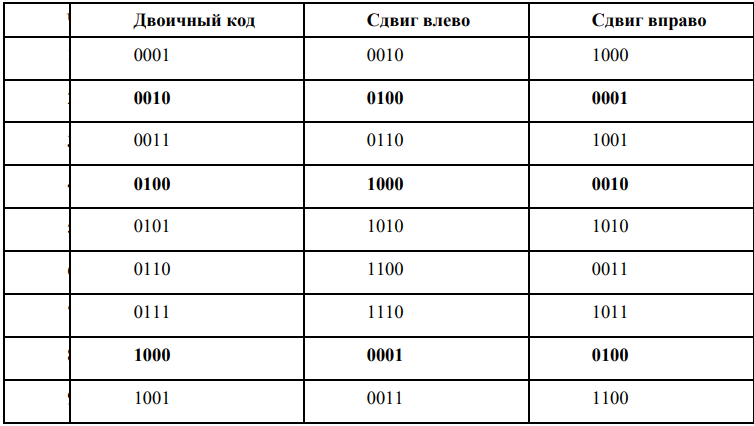

Чтобы повторить данную таблицу, будем использовать тензоры. Тензоры — это математические объекты, которые обобщают понятия скаляров, векторов и матриц. Тензоры могут представлять данные в различных измерениях. Например, вектор — это тензор ранга 1, матрица — тензор ранга 2, а тензор ранга 3 или больше может содержать данные более сложной формы

In [45]:
# двоичный код
X = np.array([
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
], dtype=np.float32)
# сдвиг влево
X_shift_left = np.array([
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 1],
], dtype=np.float32)
# сдвиг вправо
X_shift_right = np.array([
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 0, 1, 0],
    [1, 0, 1, 0],
    [0, 0, 1, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [1, 1, 0, 0],
], dtype=np.float32)
# первые 8 данных - сдвиг влево, вторые - сдвиг вправо
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=np.float32)

В данной задаче необходимо классифицировать, в какую сторону произведен сдвиг, где 0 - влево, а 1 - вправо

In [90]:
X_combined = np.vstack([np.hstack([X, X_shift_left]), np.hstack([X, X_shift_right])])
y_combined = np.hstack([np.zeros(len(X)), np.ones(len(X))])
print(X_combined)
print(y_combined)

[[0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Хочется, чтобы для обучения и тестирования использовалось одинаковое количество элементов, где y = 0 и y = 1. Для этого поделим даннные на тестовые и тренировочные в ручную

In [ ]:
y_unique, y_counts = np.unique(y_combined, return_counts=True)
print(y_unique, y_counts) 
min_class_count = 2  # Минимум по количеству меток для каждого класса

# Отбираем по min_class_count примеров каждого класса в тестовую выборку
X_test = np.vstack([X_combined[y_combined == label][:min_class_count] for label in y_unique]) 
y_test = np.hstack([y_combined[y_combined == label][:min_class_count] for label in y_unique])
# получается, мы берем первые 2 элемента для класса 0 и для класса 1

# Оставшиеся данные для обучения
X_train = np.vstack([X_combined[y_combined == label][min_class_count:] for label in y_unique])
y_train = np.hstack([y_combined[y_combined == label][min_class_count:] for label in y_unique])

print(X_test)
print(y_test)
print(X_train)
print(y_train)

[0. 1.] [9 9]
[[0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]]
[0. 0. 1. 1.]
[[0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]


В этот раз попробуем сначала подобрать лучшее количество нейронов в скрытом слое, и только потом переходить к предсказаниям

In [101]:
neurons_list = [2, 4, 8, 16, 32, 64, 128]
losses = []
accuracies = []
for neurons in neurons_list:
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, activation='sigmoid')) # Один скрытый слой с различным количеством нейронов
    model.add(Dense(1, activation='sigmoid')) # Выходной слой с одним нейроном
    
    # Компиляция модели
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    # Обучение модели
    history = model.fit(X_train, y_train, epochs=1000, batch_size=4, validation_split=0.1, verbose=0)
    losses.append(history.history['loss'][-1])

for neurons, loss in zip(neurons_list, losses):
    print(f"Количество нейронов в скрытом слое: {neurons}, ошибка обучения {loss}")

C:\Users\vlada\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Количество нейронов в скрытом слое: 2, ошибка обучения 0.3684217631816864
Количество нейронов в скрытом слое: 4, ошибка обучения 0.2522156238555908
Количество нейронов в скрытом слое: 8, ошибка обучения 0.22336441278457642
Количество нейронов в скрытом слое: 16, ошибка обучения 0.17635400593280792
Количество нейронов в скрытом слое: 32, ошибка обучения 0.15445341169834137
Количество нейронов в скрытом слое: 64, ошибка обучения 0.13838055729866028
Количество нейронов в скрытом слое: 128, ошибка обучения 0.13151128590106964


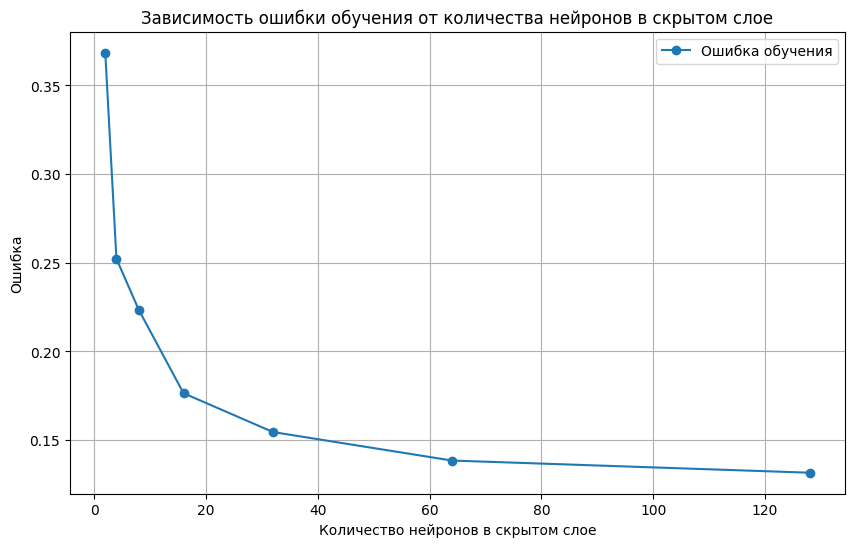

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(neurons_list, losses, marker='o', label='Ошибка обучения')
plt.xlabel('Количество нейронов в скрытом слое')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки обучения от количества нейронов в скрытом слое')
plt.legend()
plt.grid(True)
plt.show()

Итак, сделаем вывод, что самая лучшая модель имеет 128 нейронов в скрытом слое. Обучим ее таким образом и попробуем сделать предсказание

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=4, validation_split=0.1, verbose=0)

predictions = model.predict(X_test)
y_pred_classes = (predictions > 0.5).astype(int).flatten()
accuracy_score = np.mean(y_pred_classes == y_test)
print(f"Точность: {accuracy_score}")
print("Предсказания:")
for i in range(len(X_test)):
    predicted_class = 1 if predictions[i][0] > 0.5 else 0
    print(f"Данные: {X_test[i]} -> Предсказание: {predicted_class} ({predictions[i][0]:.2f}), Правильный ответ: {y_test[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Точность: 0.5
Предсказания:
Данные: [0. 0. 0. 1. 0. 0. 1. 0.] -> Предсказание: 1 (0.73), Правильный ответ: 0.0
Данные: [0. 0. 1. 0. 0. 1. 0. 0.] -> Предсказание: 0 (0.00), Правильный ответ: 0.0
Данные: [0. 0. 0. 1. 1. 0. 0. 0.] -> Предсказание: 0 (0.01), Правильный ответ: 1.0
Данные: [0. 0. 1. 0. 0. 0. 0. 1.] -> Предсказание: 1 (1.00), Правильный ответ: 1.0


В целом, неплохой результат, учитывая, что данных достаточно мало

## РАСПОЗНАВАНИЕ СИМВОЛОВ. Цель – разработать и исследовать нейронную сеть обратного распространения, предназначенную для распознавания образов.


Задание
1.    Построить и обучить нейронную сеть, которая могла бы решать задачу распознавания символов: X, Y, I, C.
2.    Найти оптимальную структуру НС, минимизировав ошибку обучения в зависимости от количества нейронов в скрытом слое
3.    Произвести тестирование нейронной сети при добавлении шума.
4.    Построить нейронную сеть в соответствии с заданиями и выполнить задания 2-3.

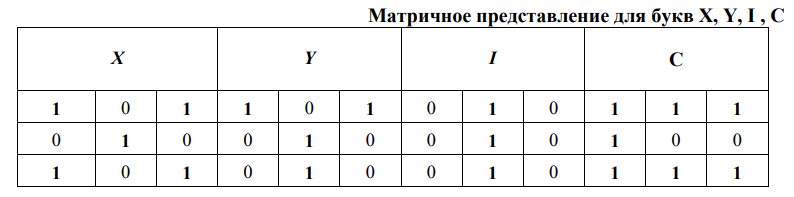

In [ ]:
X_train = np.array([
    [1, 0, 1, 0, 1, 0, 1, 0, 1],  # X
    [0, 1, 0, 0, 1, 0, 1, 1, 1],  # Y
    [1, 1, 1, 0, 0, 0, 1, 1, 1],  # I
    [0, 1, 1, 1, 0, 1, 1, 0, 1]   # C
])
y_train = np.array([
    [0, 0, 0, 1],  # X
    [0, 0, 1, 0],  # Y 
    [0, 1, 0, 0],  # I
    [1, 0, 0, 0]   # C
])

In [105]:
model = Sequential()
model.add(Dense(10, input_dim=9, activation='relu'))  # Скрытый слой с 10 нейронами
model.add(Dense(4, activation='softmax'))  # Выходной слой с 4 нейронами
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, verbose=0)
accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Accuracy: {accuracy[1]*100:.2f}%')

Accuracy: 100.00%


In [110]:
X_noisy = np.array([
    [0, 1, 0, 1, 1, 0, 1, 0, 1]  # Модифицированная буква I (с шумом)
])
prediction = model.predict(X_noisy)
print(prediction)
# Вывод результатов предсказания
predicted_class = np.argmax(prediction)
print(predicted_class)
classes = ['X', 'Y', 'I', 'C']  # Соответствие индексов классам
print('Prediction:', classes[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.07671338 0.10896576 0.4671292  0.34719163]]
2
Prediction: I


Всё работает корректно. Мы добавили шум в букву I, и модель все равно смогла сделать верное предсказание

## ИСКУССТВЕННЫЙ НОС. Цель – разработать и исследовать ИНС обратного распространения для искусственного носа, предназначенного для химического анализа воздушной среды 

Задание
1.    Исследовать и проанализировать имеющиеся экспериментальные данные (табл. 4.1), и определить количество вводов и выводов, требуемых для полносвязанной ИНС обратного распространения.
2.    Создать и обучить нейронную сеть, которая будет способна указывать наличие определенных примесей в воздухе при анализе показаний химических датчиков.
3.    Обучить нейронную сеть, расшив количество представительских выборок (обучающих пар), применяемых для обучения ИНС (табл. 4.2).
4.    Определить оптимальную структуру нейронной сети с точки зрения минимизации среднеквадратической ошибки обучения.

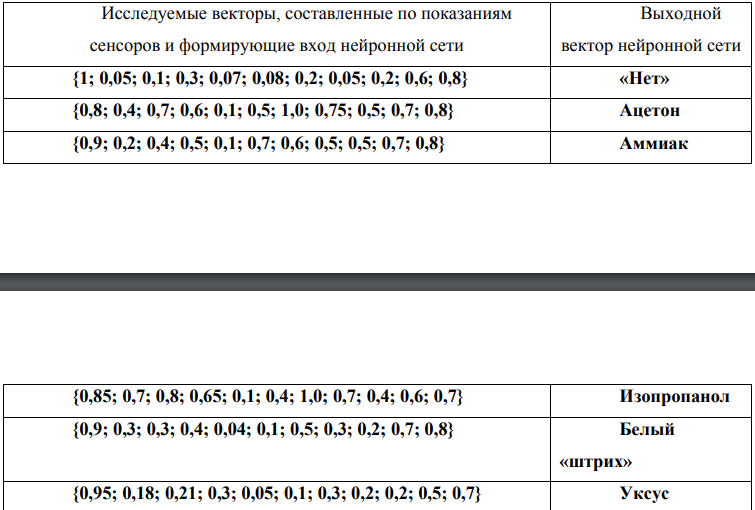

In [ ]:
X = np.array([
    [1, 0.05, 0.1, 0.3, 0.07, 0.08, 0.2, 0.05, 0.2, 0.6, 0.8],
    [0.8, 0.4, 0.7, 0.6, 0.1, 0.5, 1.0, 0.75, 0.5, 0.7, 0.8],
    [0.9, 0.2, 0.4, 0.5, 0.1, 0.7, 0.6, 0.5, 0.5, 0.7, 0.8],
    [0.85, 0.7, 0.8, 0.65, 0.1, 0.4, 1.0, 0.7, 0.4, 0.6, 0.7],
    [0.9, 0.3, 0.3, 0.4, 0.4, 0.5, 1.0, 0.8, 0.3, 0.7, 0.8],
    [0.95, 0.18, 0.21, 0.3, 0.35, 0.6, 0.5, 0.7, 0.4, 0.6, 0.8]
])

Y = np.array([
    [0, 0, 0, 0, 0, 1], # Нет
    [1, 0, 0, 0, 0, 0], # Ацетон
    [0, 1, 0, 0, 0, 0], # Аммиак
    [0, 0, 1, 0, 0, 0], # Изопропанол
    [0, 0, 0, 1, 0, 0], # Белый «штрих»
    [0, 0, 0, 0, 1, 0], # Уксус
])

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [127]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(11,)),  # Количество входов соответствует количеству датчиков
    tf.keras.layers.Dense(4, activation='sigmoid'),    # Скрытый слой с 4 нейронами и функцией активации ReLU
    tf.keras.layers.Dense(6, activation='sigmoid')  # Выходной слой с 6 нейронами и softmax для классификации
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1000, batch_size=1, verbose=0)

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)
print("y_test: ", Y_test[0])
print("true classes", true_classes[0])

print(f'Предсказание: {predictions}')
correct_predictions = np.sum(predicted_classes == true_classes)
total_predictions = len(true_classes)
accuracy_on_test_data = correct_predictions / total_predictions

print(f'Точность: {accuracy_on_test_data}')
print(f'Предсказание: {predicted_classes}')
print(f'Правильный ответ: {true_classes}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
y_test:  [0 0 0 0 0 1]
true classes 5
Предсказание: [[0.01157508 0.6230862  0.41594088 0.5633688  0.60521185 0.01594233]
 [0.02067476 0.59225774 0.7463939  0.5251237  0.40775257 0.02690768]]
Точность: 0.0
Предсказание: [1 2]
Правильный ответ: [5 0]


## ПРОГНОЗИРОВАНИЕ. Цель – разработать и исследовать нейронную сеть обратного распространения, предназначенную для прогнозирования временных серий, а также для анализа качества генератора случайных чисел.


Задание
1.    Создать и обучить нейронную сеть, предназначенную для анализа временных серий заданной размерности и отражающую структуру данных серий. Окно скольжения равно 25, глубина прогноза: 2, число обучающих выборок: 8.
2.    Осуществить прогноз значений будущих элементов временных серий.
3.    Проверить работу НС и определить точность прогноза по формуле: 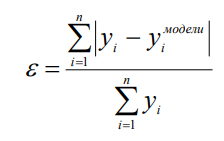


Окно скольжения — это фиксированная длина последовательности данных, которая используется для прогнозирования последующих значений. В данном контексте размер окна равен 25. Это означает, что на каждом шаге мы берем 25 последовательных значений временного ряда, чтобы сделать прогноз будущих значений. Таким образом, окно "скользит" по временной серии, генерируя входные данные для обучения модели

Глубина прогноза представляет собой количество будущих шагов, которые модель должна предсказать. В данном случае глубина прогноза равна 2, что означает, что для каждого окна размером 25 модель должна предсказать значения следующих двух временных точек. Эта глубина прогнозирования определяет горизонт, на который мы хотим получить прогноз

Число обучающих выборок — это количество примеров, которые используются для обучения модели. В данном коде этот параметр обозначает, сколько подвыборок будет извлечено из временного ряда, но фактически значение n_samples = 8 не используется напрямую, так как весь временной ряд делится на части для формирования обучающей выборки. Однако общее количество обучающих примеров определяется самим процессом разбиения временного ряда на окна с использованием скользящего окна и глубины прогноза

По сути, окно скольжения - это число входных нейронов, глубина скольжения - число выходных нейронов, число обучающих выборок - сколько пар X_train и y_train будем использовать для обучения

In [88]:
data = np.sin(np.linspace(0, 100, 500))  # 500 равномерно распределенных значений от 0 до 100, для каждого синус
sliding_window = 25 # число предыдущих точек, используемых для предсказания
forecast_depth = 2 # количество будущих точек, которые нужно предсказать
n_samples = 8 
X, y = [], []
for i in range(len(data) - sliding_window - forecast_depth + 1):
    X.append(data[i:i + sliding_window]) 
    y.append(data[i + sliding_window:i + sliding_window + forecast_depth])

X, y = np.array(X), np.array(y)
print(X)
X_train = X[:n_samples]  # Первые 8 примеров для обучения
y_train = y[:n_samples]
X_test = X[n_samples:]  # Остальные примеры для тестирования
y_test = y[n_samples:]

[[ 0.          0.19906213  0.39015654 ... -0.95427499 -0.99468264
  -0.99527686]
 [ 0.19906213  0.39015654  0.56563445 ... -0.99468264 -0.99527686
  -0.95603388]
 [ 0.39015654  0.56563445  0.71847213 ... -0.99527686 -0.95603388
  -0.87852444]
 ...
 [ 0.14053123  0.33480544  0.51567865 ... -0.98681403 -0.99928463
  -0.97175761]
 [ 0.33480544  0.51567865  0.67591117 ... -0.99928463 -0.97175761
  -0.90533477]
 [ 0.51567865  0.67591117  0.8090895  ... -0.97175761 -0.90533477
  -0.80267477]]


Видим, что в данном случае окно скольжения равно 25, при этом шаг скольжения равен 1 (первый массив идет с 1 элемента, второй со 2, и так далее)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(sliding_window,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(forecast_depth)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

C:\Users\vlada\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
predictions = model.predict(X_test)
y_actual = y_test.flatten()
y_predicted = predictions.flatten()
epsilon = np.sum(np.abs(y_actual - y_predicted)) / np.sum(np.abs(y_actual))
print(f'Точность прогноза на тестовых данных (Epsilon): {epsilon}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Точность прогноза на тестовых данных (Epsilon): 0.9831457957728542


Значение 0.98 означает, что средняя абсолютная ошибка прогноза составляет примерно 98% от суммы абсолютных значений истинных данных. Это очень высокое значение, можно предсположить, что такая высокая ошибка возникает из-за очень маленького числа обучающих данных (8 из 100)

4.    Создать и обучить две нейронные сети: предназначенную для анализа временных серий заданной размерности (окно скольжения равно 4, шаг скольжения S=1, период упреждения (шаг или глубина прогноза) m=1.) и для многофакторного прогнозирования (приложение 1).


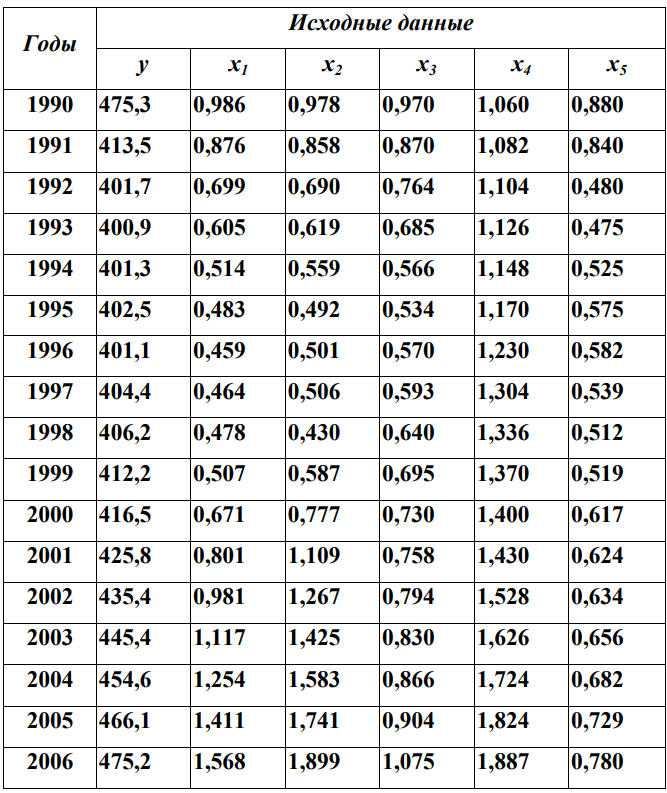

1) Шаг скольжения - Это то, насколько мы сдвигаемся вперед при создании следующего окна (набора данных) из временного ряда. После обработки текущего окна мы решаем, с какой позиции начинать следующее окно. Пример: 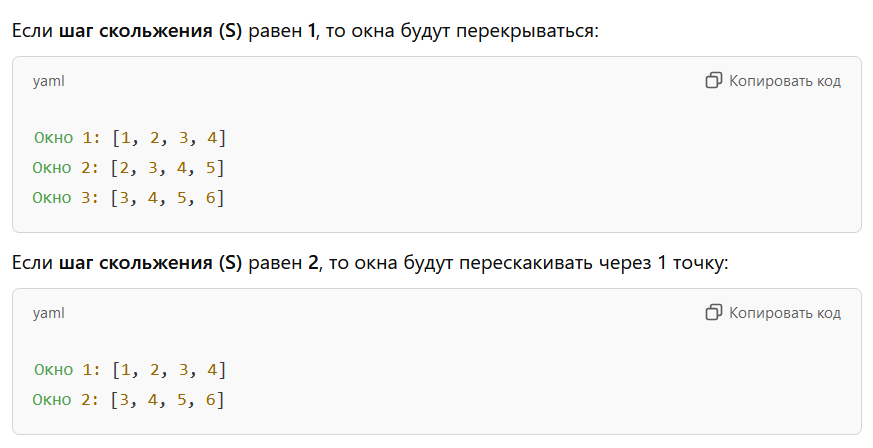
2) Период упреждения - Это количество точек в будущем, которые мы хотим предсказать на основе текущего окна. Иногда это называют глубиной прогноза

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
data_dict = {
    'year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006],
    'y': [475.3, 413.5, 401.7, 400.9, 401.3, 402.5, 401.1, 404.4, 406.2, 412.2, 416.5, 425.8, 435.4, 445.4, 454.6, 466.1, 475.2],
    'x1': [0.986, 0.876, 0.699, 0.605, 0.514, 0.483, 0.459, 0.464, 0.478, 0.507, 0.671, 0.801, 0.981, 1.117, 1.254, 1.411, 1.568],
    'x2': [0.978, 0.858, 0.690, 0.619, 0.559, 0.492, 0.501, 0.506, 0.430, 0.587, 0.777, 1.109, 1.267, 1.425, 1.583, 1.741, 1.899],
    'x3': [0.970, 0.870, 0.764, 0.685, 0.566, 0.534, 0.570, 0.593, 0.640, 0.695, 0.730, 0.758, 0.794, 0.830, 0.866, 0.904, 1.075],
    'x4': [1.060, 1.082, 1.104, 1.126, 1.148, 1.170, 1.230, 1.304, 1.336, 1.370, 1.400, 1.430, 1.528, 1.626, 1.724, 1.824, 1.887],
    'x5': [0.880, 0.840, 0.480, 0.475, 0.525, 0.575, 0.582, 0.539, 0.512, 0.519, 0.617, 0.624, 0.634, 0.656, 0.682, 0.729, 0.780]
}

data = pd.DataFrame(data_dict)

window_size = 4
prediction_period = 1

In [6]:
columns_to_transform = ['x1', 'x2', 'x3', 'x4', 'x5']

transformed_data = pd.DataFrame()

for col in columns_to_transform:
    for i in range(-window_size // 2 + 1, window_size // 2 + 1):
        transformed_data[f'{col}{i:+}'] = data[col].shift(-i)

transformed_data['y'] = data['y']
transformed_data = transformed_data.dropna().reset_index(drop=True)
transformed_data.head()


,x1-1,x1+0,x1+1,x1+2,x2-1,x2+0,x2+1,x2+2,x3-1,x3+0,...,x3+2,x4-1,x4+0,x4+1,x4+2,x5-1,x5+0,x5+1,x5+2,y
0,0.986,0.876,0.699,0.605,0.978,0.858,0.690,0.619,0.970,0.870,...,0.685,1.060,1.082,1.104,1.126,0.880,0.840,0.480,0.475,413.5
1,0.876,0.699,0.605,0.514,0.858,0.690,0.619,0.559,0.870,0.764,...,0.566,1.082,1.104,1.126,1.148,0.840,0.480,0.475,0.525,401.7
2,0.699,0.605,0.514,0.483,0.690,0.619,0.559,0.492,0.764,0.685,...,0.534,1.104,1.126,1.148,1.170,0.480,0.475,0.525,0.575,400.9
3,0.605,0.514,0.483,0.459,0.619,0.559,0.492,0.501,0.685,0.566,...,0.570,1.126,1.148,1.170,1.230,0.475,0.525,0.575,0.582,401.3
4,0.514,0.483,0.459,0.464,0.559,0.492,0.501,0.506,0.566,0.534,...,0.593,1.148,1.170,1.230,1.304,0.525,0.575,0.582,0.539,402.5


In [ ]:
train_size = int(len(transformed_data) * 0.8)

X_train = transformed_data.iloc[:train_size, :-1] 
X_test = transformed_data.iloc[train_size:, :-1] 
y_train = transformed_data.iloc[:train_size, -1]  
y_test = transformed_data.iloc[train_size:, -1]  

print("x", X_test)
print()
print("y", y_test)

x      x1-1   x1+0   x1+1   x1+2   x2-1   x2+0   x2+1   x2+2   x3-1   x3+0  \
11  0.801  0.981  1.117  1.254  1.109  1.267  1.425  1.583  0.758  0.794   
12  0.981  1.117  1.254  1.411  1.267  1.425  1.583  1.741  0.794  0.830   
13  1.117  1.254  1.411  1.568  1.425  1.583  1.741  1.899  0.830  0.866   

     x3+1   x3+2   x4-1   x4+0   x4+1   x4+2   x5-1   x5+0   x5+1   x5+2  
11  0.830  0.866  1.430  1.528  1.626  1.724  0.624  0.634  0.656  0.682  
12  0.866  0.904  1.528  1.626  1.724  1.824  0.634  0.656  0.682  0.729  
13  0.904  1.075  1.626  1.724  1.824  1.887  0.656  0.682  0.729  0.780  

y 11    435.4
12    445.4
13    454.6
Name: y, dtype: float64


In [ ]:
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, verbose=0)


C:\Users\vlada\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test)
print(predictions)
print(y_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[429.4237 ]
 [466.26334]
 [524.52374]]
11    435.4
12    445.4
13    454.6
Name: y, dtype: float64
Mean Absolute Error (MAE): 32.25445760091145


В целом для наших данных 32 - это не сильно большая ошибка. Значит модель достаточно точная

5.    Создать и обучить нейронную сеть для решения задачи многофакторного прогнозирования (исходные данные взять из практической работы № 2). Сравнить полученный результат по МГУА и НС

In [38]:
data = {
    'y': [0.904, 0.922, 0.763, 0.923, 0.918, 0.906, 0.905, 0.545, 0.894, 0.9, 
          0.932, 0.74, 0.701, 0.744, 0.921, 0.927, 0.802, 0.747, 0.927, 0.721,
          0.913, 0.918, 0.833, 0.914, 0.923],
    'x1': [75.5, 78.5, 78.4, 77.7, 84.4, 75.9, 76, 67.5, 78.2, 78.1, 
           78.6, 84, 59.2, 90.2, 72.8, 67.7, 82.6, 74.4, 83.3, 83.7, 
           73.8, 79.2, 71.5, 75.3, 79],
    'x2': [25.2, 21.8, 25.7, 17.8, 15.9, 22.4, 20.6, 25.2, 20.7, 17.5, 
           19.7, 18.5, 54.4, 23, 20.2, 25.2, 22.4, 22.7, 18.1, 20.1, 
           17.3, 16.8, 29.9, 20.3, 14.1],
    'x3': [3343, 3001, 3101, 3543, 3237, 3330, 3808, 2415, 3295, 3504, 
           30565, 3007, 2844, 2861, 3259, 3350, 3344, 2704, 3642, 2753, 
           2916, 3551, 3177, 3280, 3160],
    'x4': [77, 78.2, 68, 77.2, 77.2, 77.2, 75.7, 62.6, 78, 78.2, 
           79, 67.6, 69.8, 68.4, 77.9, 78.1, 72.5, 66.6, 76.7, 68.8, 
           76.8, 78.1, 73.9, 78.6, 78.5]
}
df = pd.DataFrame(data)
X = df[['x1', 'x2', 'x3', 'x4']].values
y = df['y'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Выходной слой для регрессии
])

C:\Users\vlada\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [42]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000, batch_size=8, verbose=0)
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f'mse: {mse}')
y_pred = model.predict(X_test)
print(f'Predictions: {y_pred.flatten()}')

mse: 0.00038437385228462517
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predictions: [0.9115109  0.8389051  0.8891167  0.91371256 0.7456264 ]


Во 2 практике MSE получилась 0.00034271751894955513